# Génération de partition de musique : réseau LSTM

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import sys
import os
import json

In [5]:
sys.path.append('/content/drive/MyDrive/LSTM')
sys.path.append('/content/drive/MyDrive/data')
sys.path.append('/content/drive/MyDrive/')

In [7]:
from melodypreprocessor import *
from melodygenerator import *
from LSTM import *
from train import *
from extract_data import *

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

import matplotlib.pyplot as plt

In [8]:
melody_preprocessor = MelodyPreprocessor("/content/drive/MyDrive/data/datasetA.json", batch_size=32)
train_dataset = melody_preprocessor.create_training_dataset()
vocab_size = melody_preprocessor.number_of_tokens_with_padding
max_length_melody = melody_preprocessor.max_melody_length

print("Taille du vocabulaire :",vocab_size)
print("Taille de la plus grande mélodie :",max_length_melody)

Taille du vocabulaire : 317
Taille de la plus grande mélodie : 249


### Modèle LSTM

In [9]:
embedding_dim = 64
model = LSTMModel(vocab_size,embedding_dim,max_length_melody)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
epochs = 30
iters,losses = train(train_dataset,model,epochs)

Training the model ...


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
Epoch 26 Batch 651 Loss 0.9900583028793335
Epoch 26 Batch 652 Loss 0.6712548136711121
Epoch 26 Batch 653 Loss 0.5791230797767639
Epoch 26 Batch 654 Loss 0.776465117931366
Epoch 26 Batch 655 Loss 0.779997706413269
Epoch 26 Batch 656 Loss 1.08335280418396
Epoch 26 Batch 657 Loss 1.0015815496444702
Epoch 26 Batch 658 Loss 1.1001871824264526
Epoch 26 Batch 659 Loss 0.7942456603050232
Epoch 26 Batch 660 Loss 0.8276288509368896
Epoch 26 Batch 661 Loss 0.8592875003814697
Epoch 26 Batch 662 Loss 0.8615590333938599
Epoch 26 Batch 663 Loss 0.9368508458137512
Epoch 26 Batch 664 Loss 0.7764301300048828
Epoch 26 Batch 665 Loss 1.0439814329147339
Epoch 26 Batch 666 Loss 1.047213077545166
Epoch 26 Batch 667 Loss 0.8863208889961243
Epoch 26 Batch 668 Loss 0.9847922325134277
Epoch 26 Batch 669 Loss 1.0699471235275269
Epoch 26 Batch 670 Loss 0.8795270323753357
Epoch 26 Batch 671 Loss 0.8270332217216492
Epoch 26 Batch 672 Loss 

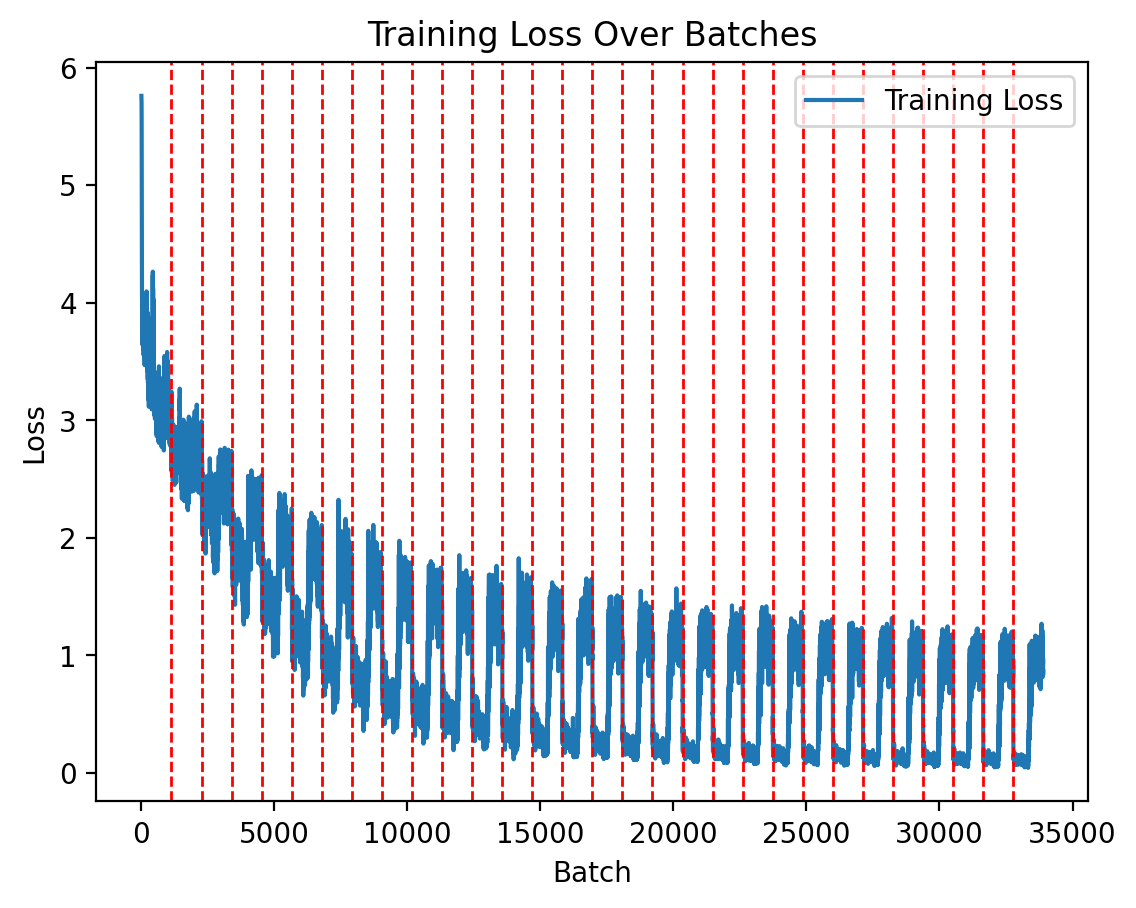

In [11]:
def plot_losses(iters,losses):
    plt.plot(iters,losses, label='Training Loss')
    for i in range(1130,len(iters),1130):
        plt.axvline(x=i, color='r', linestyle='--', linewidth=1)
    plt.xlabel('Batch')
    plt.ylabel('Loss')
    plt.title('Training Loss Over Batches')
    plt.legend()
    plt.show()

plot_losses(iters,losses)

In [21]:
k = 6

seq = extract_random_seq("/content/drive/MyDrive/data/data.json",k)
print("Séquence initiale :\n",seq)
print()
original = extract_seq_from("/content/drive/MyDrive/data/data.json",seq[0],seq[2])
print("Séquence d'origine :\n",original)

A
Séquence initiale :
 ['Cabaceira mon amour', '2/4', 'A', 'G major', ['B4-0.5', 'B3-0.5', 'B3-1.0', 'B4-0.25', 'E4-0.25', 'G4-0.25']]

Séquence d'origine :
 ['Cabaceira mon amour', 'A', 'G major', ['B4-0.5', 'B3-0.5', 'B3-1.0', 'B4-0.25', 'E4-0.25', 'G4-0.25', 'B4-0.25', 'G4-0.25', 'E4-0.25', 'B4-0.25', 'B4-0.25', 'rest-0.25', 'E4-0.25', 'G4-0.25', 'B4-0.25', 'G4-0.25', 'E4-0.25', 'B4-0.25', 'B4-0.25', 'rest-0.25', 'D#4-0.25', 'F#4-0.25', 'B4-0.25', 'F#4-0.25', 'D#4-0.25', 'B4-0.25', 'B4-0.25', 'rest-0.25', 'D#4-0.25', 'F#4-0.25', 'B4-0.25', 'F#4-0.25', 'D#4-0.25', 'B4-0.25', 'B4-0.25', 'rest-0.25', 'D4-0.25', 'F4-0.25', 'B4-0.25', 'F4-0.25', 'D4-0.25', 'B4-0.25', 'B4-0.25', 'rest-0.25', 'D4-0.25', 'F4-0.25', 'B4-0.25', 'F4-0.25', 'D4-0.25', 'A4-0.25', 'A4-0.25', 'rest-0.25', 'C#4-0.25', 'E4-0.25', 'A4-0.25', 'E4-0.25', 'C#4-0.25', 'A4-0.25', 'A4-0.25', 'rest-0.25', 'C#4-0.25', 'E4-0.25', 'A4-0.25', 'E4-0.25', 'C#4-0.25', 'A4-0.25', 'A4-0.25', 'rest-0.25', 'C4-0.25', 'E4-0.25', 'A4-0.

In [22]:
melody_generator = MelodyGenerator(model,melody_preprocessor.tokenizer,10)

new_melody,proba = melody_generator.generate(seq[-1],mode=2)
print("Sans teacher forcing:",proba)
new_melody,proba = melody_generator.generate(seq[-1],teacher_forcing=True,melody=original[-1],mode=2)
print("Avec teacher forcing:",proba)

Sans teacher forcing: [1, 1, 1, 1, 1, 1, 0.049060326, 0.050278645, 0.048991423, 0.049224332, 0.06868169, 0.04906957]
Avec teacher forcing: [1, 1, 1, 1, 1, 1, 0.049104843, 0.055893, 0.049120717, 0.050151467, 0.049162444, 0.04928489]


In [23]:
melodies_generated=[]

In [30]:
k = 10

for _ in range(20):
    print("Generating a melody...")
    seq = extract_random_seq("/content/drive/MyDrive/data/data.json",k,"A")
    original = extract_seq_from("/content/drive/MyDrive/data/data.json",seq[0],seq[2])
    new_melody,p = melody_generator.generate(seq[-1],teacher_forcing=True,melody=original[-1],mode=2,k=40)
    melodies_generated.append((seq,new_melody,original,p))

Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A
Generating a melody...
A


In [31]:
generated = [ {'Title' : s[0] , 'Part': s[2], 'Key' : s[3] ,'Start_sequence' :s[4] ,'Proba': [ str(proba) for proba in p] ,'Generated' : m.split() , 'Original' : o[-1]} for (s,m,o,p) in melodies_generated ]
print(len(generated))

65


In [32]:
with open("/content/drive/MyDrive/Generated/generated.json","w") as f:
    json.dump(generated,f,indent=2)